# Biomedical 

Machine Learning solution for determining the movement direction from spike trains of 36 neurons

In [1]:
from sklearn.neighbors import KNeighborsClassifier 
import numpy as np
import matplotlib.pyplot as plt

Function for plotting data

In [2]:
def plotData(data,xlabel,ylabel,title):
    plt.plot(data);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.title(title);
    plt.show()

- Loading dataset 
- Checking data shape
- Visualizing the training data

In [3]:
angleTraining = np.loadtxt("Angle_Training.txt")
angleTesting = np.loadtxt("Angle_Testing.txt")
spikeTraining = np.loadtxt("Training_SpikeTrains.txt")
spikeTesting = np.loadtxt("Testing_SpikeTrains.txt")
print(angleTraining.shape)
print(angleTesting.size)
print(spikeTraining.shape)
print(spikeTesting.shape)

(8000,)
1000
(36, 8000)
(36, 1000)


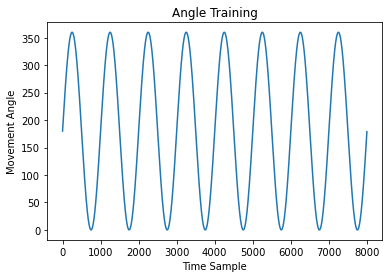

In [4]:
plotData(angleTraining,"Time Sample","Movement Angle","Angle Training")

In [5]:
spikeTraining = spikeTraining.transpose()
spikeTesting = spikeTesting.transpose()

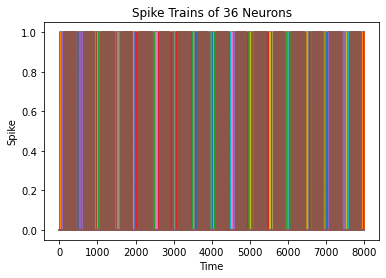

In [6]:
plotData(spikeTraining,"Time","Spike","Spike Trains of 36 Neurons")

## Limiting the movement direction to one of four directions for classification:
- 0° to 90°-> 0
- 90° to 180°-> 1
- 180° to 270°-> 2
- 270° to 360°-> 3

In [7]:
for i in range(angleTraining.size):
    if(angleTraining[i] >= 0 and angleTraining[i] < 90):
        angleTraining[i] = 0
    elif(angleTraining[i] >= 90 and angleTraining[i] < 180):
        angleTraining[i] = 1
    elif(angleTraining[i] >= 180 and angleTraining[i] < 270):
        angleTraining[i] = 2
    elif(angleTraining[i] >= 270 and angleTraining[i] <= 360):
        angleTraining[i] = 3   

In [8]:
for i in range(angleTesting.size):
    if(angleTesting[i] >= 0 and angleTesting[i] < 90):
        angleTesting[i] = 0
    elif(angleTesting[i] >= 90 and angleTesting[i] < 180):
        angleTesting[i] = 1
    elif(angleTesting[i] >= 180 and angleTesting[i] < 270):
        angleTesting[i] = 2
    elif(angleTesting[i] >= 270 and angleTesting[i] <= 360):
        angleTesting[i] = 3   

## K-Nearest Neighbor (KNN) classifier

Building classifiers using values for K in the range 1 to 300 and calculating the accuracy at each K value. 

In [9]:
accuracy= np.zeros(301)
for i in range(1,301):
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(spikeTraining, angleTraining) 
    accuracy[i]=knn.score(spikeTesting, angleTesting)

Plotting the accuracy calculated at each K value and showing the maximum accuracy obtained and to which K-value it belongs.

Highest accuracy is 73.5 % at K = 199


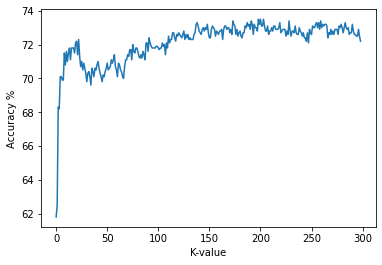

In [10]:
plt.plot(accuracy[1:300]*100);
print("Highest accuracy is",accuracy[np.argmax(accuracy)]*100,"% at K =",np.argmax(accuracy))
plt.xlabel("K-value")
plt.ylabel("Accuracy %")
plt.savefig('accuracyGraph.jpg')
plt.show()
